In [2]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your dataset.zip file


Saving dataset.zip to dataset.zip


In [3]:
import zipfile
import os

# Unzip the dataset
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("Dataset extracted!")


Dataset extracted!


In [4]:
# List extracted folder contents
print("Contents of dataset folder:")
print(os.listdir("dataset"))


Contents of dataset folder:
['ASL-Dataset']


In [5]:
import pandas as pd
import os
from IPython.display import display


# Load CSV files
test_csv = pd.read_csv("dataset/ASL-Dataset/test/_classes.csv")
train_csv = pd.read_csv("dataset/ASL-Dataset/train/_classes.csv")
valid_csv = pd.read_csv("dataset/ASL-Dataset/valid/_classes.csv")

# Display dataset information
def inspect_dataset(name, df):
    print(f"\n{name} Dataset:\n")
    print(f"Number of samples: {len(df)}")
    #print(f"Columns: {df.columns.tolist()}")
    #print("\nSample rows:\n")
    #display(df.head())

# Inspect train, test, and validation datasets
inspect_dataset("Train", train_csv)
inspect_dataset("Test", test_csv)
inspect_dataset("Validation", valid_csv)

# Check for missing values
def check_missing_values(df, name):
    missing = df.isnull().sum().sum()
    print(f"\n{name} Dataset Missing Values: {missing}")

check_missing_values(train_csv, "Train")
check_missing_values(test_csv, "Test")
check_missing_values(valid_csv, "Validation")



Train Dataset:

Number of samples: 1512

Test Dataset:

Number of samples: 72

Validation Dataset:

Number of samples: 144

Train Dataset Missing Values: 0

Test Dataset Missing Values: 0

Validation Dataset Missing Values: 0


In [6]:
print(train_csv.columns)

Index(['filename', ' A', ' B', ' C', ' D', ' E', ' F', ' G', ' H', ' I', ' J',
       ' K', ' L', ' M', ' N', ' O', ' P', ' Q', ' R', ' S', ' T', ' U', ' V',
       ' W', ' X', ' Y', ' Z'],
      dtype='object')


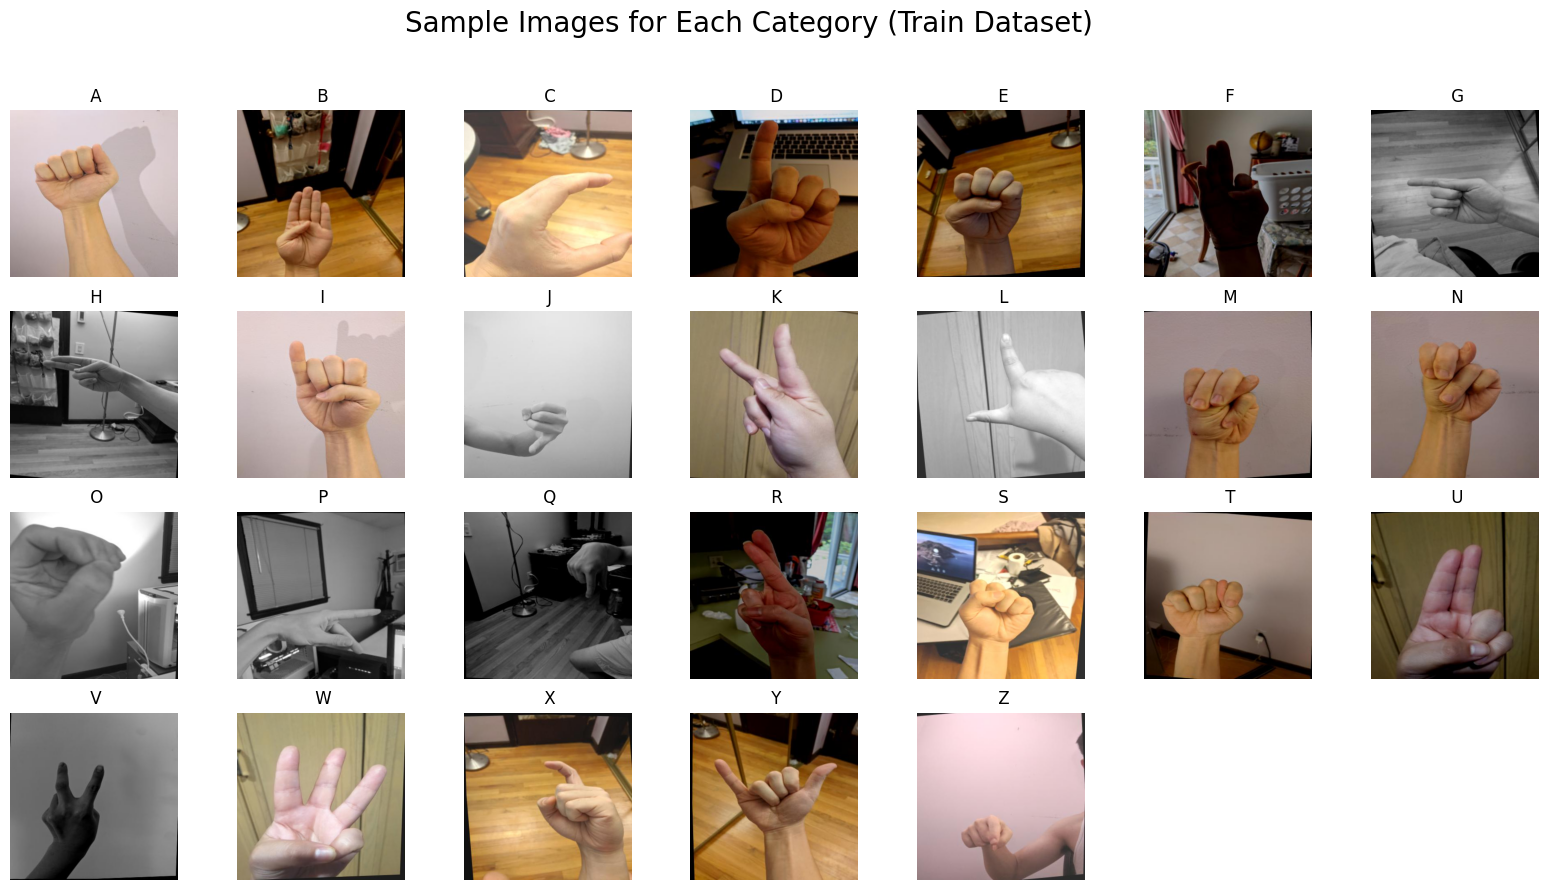

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Function to plot sample images for each alphabet category
def plot_sample_images(df, dataset_path, title):
    # Extract categories from the columns
    categories = df.columns[1:]  # Exclude the file name column
    sample_images = []
    labels = []

    for category in categories:
        # Find one sample for each category
        sample = df[df[category] == 1].iloc[0]
        image_path = os.path.join(dataset_path, sample['filename'])
        sample_images.append(image_path)
        labels.append(category)

    # Plot images
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(sample_images):
        plt.subplot(4, 7, i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis("off")
    plt.suptitle(title, fontsize=20)
    plt.show()

# Call this function for the train dataset
plot_sample_images(
    train_csv,
    "dataset/ASL-Dataset/train",  # Path to the train images
    "Sample Images for Each Category (Train Dataset)"
)


Category  Count
       A     69
       B     39
       C     54
       D     63
       E     63
       F     60
       G     60
       H     51
       I     78
       J     78
       K     51
       L     72
       M     51
       N     60
       O     54
       P     51
       Q     60
       R     48
       S     69
       T     42
       U     48
       V     57
       W     57
       X     63
       Y     48
       Z     66


<ipython-input-9-f8839caf7a6d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


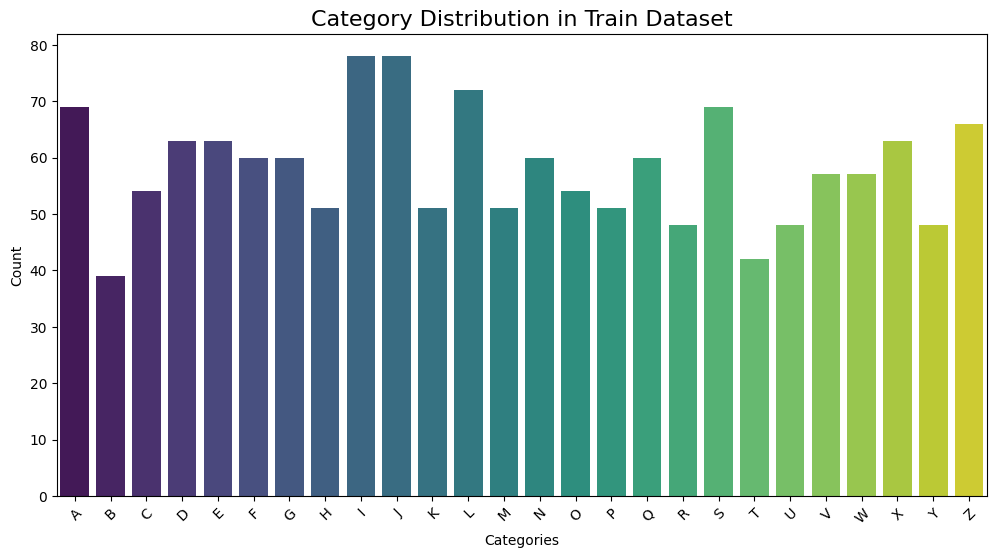

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to check category distribution and display counts
def check_imbalances(df, title):
    # Extract categories from the columns (excluding filename)
    categories = df.columns[1:]
    category_counts = df[categories].sum()

    # Display counts in tabular format
    category_table = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})
    print(category_table.to_string(index=False))  # Print table

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title, fontsize=16)
    plt.ylabel("Count")
    plt.xlabel("Categories")
    plt.show()

# Call this function for the train dataset
check_imbalances(train_csv, "Category Distribution in Train Dataset")


Category  Count
       A      1
       B      3
       C      4
       D      1
       E      0
       F      2
       G      5
       H      3
       I      2
       J      4
       K      4
       L      0
       M      3
       N      3
       O      3
       P      1
       Q      2
       R      2
       S      3
       T      5
       U      2
       V      4
       W      5
       X      4
       Y      2
       Z      4


<ipython-input-9-f8839caf7a6d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


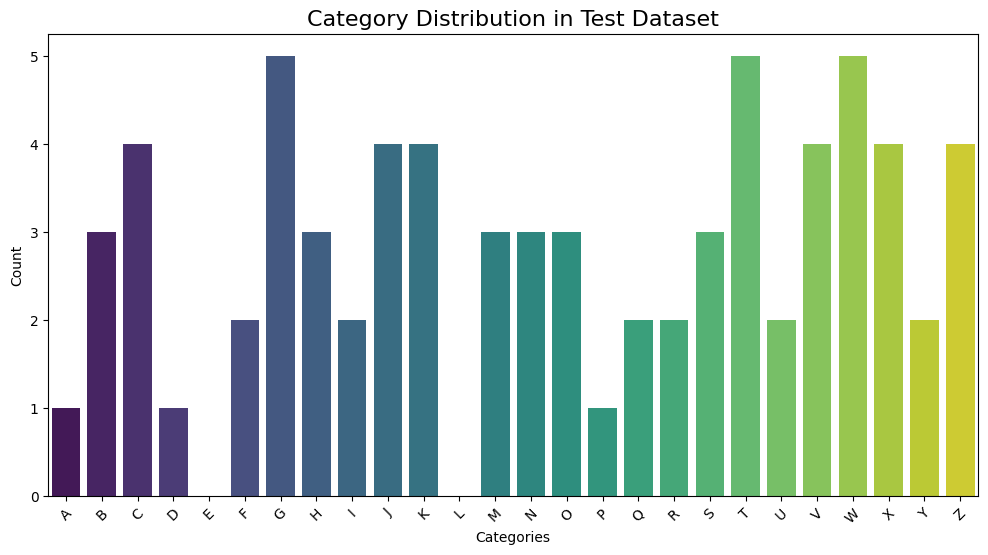

In [14]:
# Call this function for the train dataset
check_imbalances(test_csv, "Category Distribution in Test Dataset")

Category  Count
       A      5
       B      9
       C      3
       D      6
       E      4
       F      8
       G      5
       H      9
       I      2
       J      8
       K      6
       L      4
       M      8
       N      4
       O      7
       P      7
       Q      4
       R      7
       S      4
       T      6
       U      7
       V      5
       W      3
       X      1
       Y      8
       Z      4


<ipython-input-9-f8839caf7a6d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


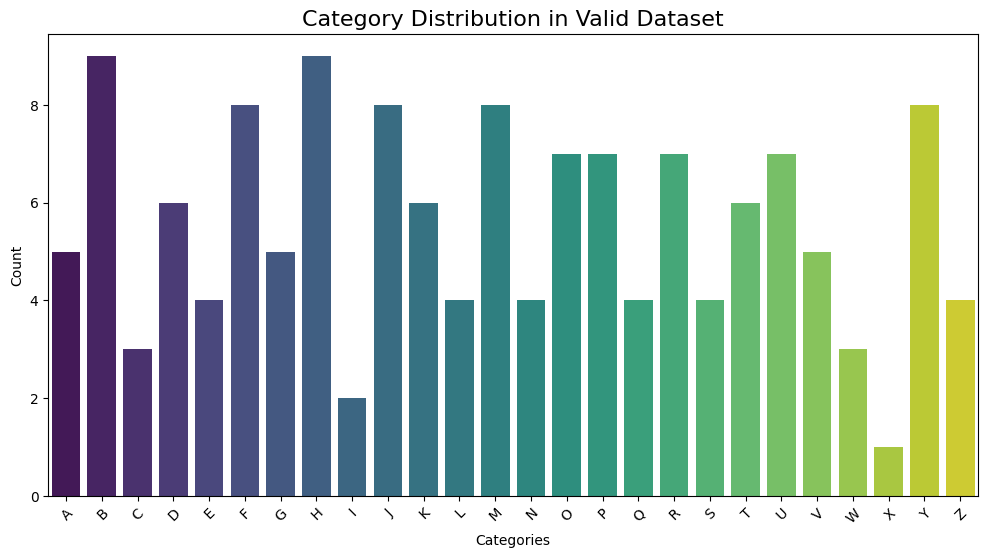

In [15]:
# Call this function for the train dataset
check_imbalances(valid_csv, "Category Distribution in Valid Dataset")

Category  Count
       A     39
       B     39
       C     39
       D     39
       E     39
       F     39
       G     39
       H     39
       I     39
       K     39
       L     39
       M     39
       N     39
       O     39
       P     39
       Q     39
       R     39
       S     39
       T     39
       U     39
       V     39
       W     39
       X     39
       Y     39


<ipython-input-12-5d1048d67be4>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(selected_counts.keys()), y=list(selected_counts.values()), palette="viridis")


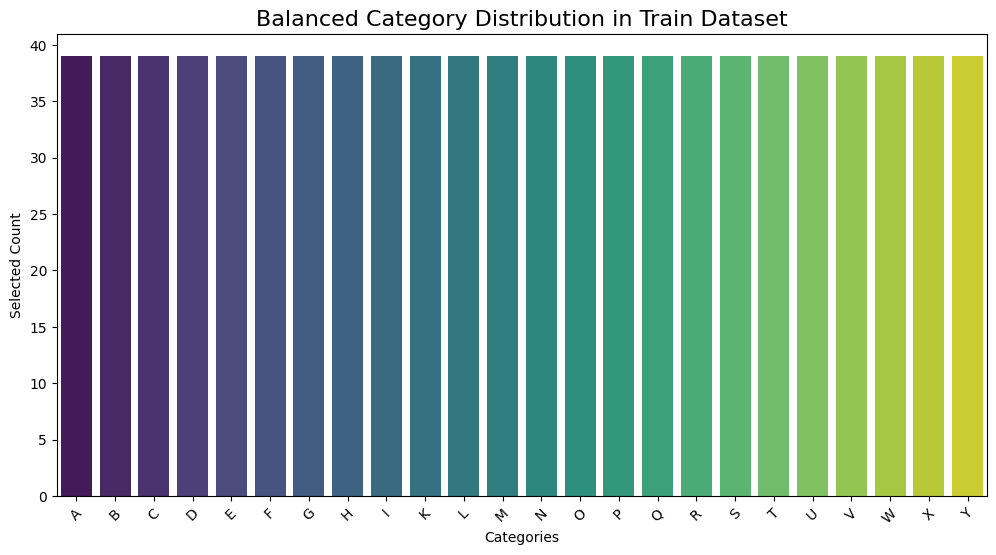

In [12]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shutil import copyfile

# Function to randomly select images per category and display distribution
def select_and_visualize_images(df, source_folder, destination_folder, num_samples, title):

    # Remove 'filename' column and exclude classes J and Z
    df.columns = df.columns.str.strip()  # Remove any whitespace issues
    categories = [col for col in df.columns if col not in ['filename', 'J', 'Z']]

    selected_counts = {}  # Store selected image counts per class

    # Create destination folder if not exists
    os.makedirs(destination_folder, exist_ok=True)

    for category in categories:
        # Get all images for the category
        image_list = df[df[category] == 1]['filename'].tolist()

        # Select 'num_samples' images randomly (only if enough images exist)
        selected_images = random.sample(image_list, min(len(image_list), num_samples))

        # Save selected count
        selected_counts[category] = len(selected_images)

        # Create class-specific folder
        class_folder = os.path.join(destination_folder, category)
        os.makedirs(class_folder, exist_ok=True)

        # Copy selected images to new folder
        for img in selected_images:
            copyfile(os.path.join(source_folder, img), os.path.join(class_folder, img))

    # Convert selected counts to DataFrame and display in table format
    selected_table = pd.DataFrame({'Category': selected_counts.keys(), 'Count': selected_counts.values()})
    print(selected_table.to_string(index=False))

    # Plot bar chart for selected images
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(selected_counts.keys()), y=list(selected_counts.values()), palette="viridis")
    plt.xticks(rotation=45)
    plt.title(title, fontsize=16)
    plt.ylabel("Selected Count")
    plt.xlabel("Categories")
    plt.show()

# Load the CSV file (Replace 'path/to/csv' with actual file path)
#csv_path = "path/to/_classes.csv"  # Update this with actual path
#train_csv = pd.read_csv(csv_path)

# Run the function with your dataset path
select_and_visualize_images(
    df=train_csv,
    source_folder="dataset/ASL-Dataset/train",
    destination_folder="dataset/ASL-Dataset/selected_train",
    num_samples=39,
    title="Balanced Category Distribution in Train Dataset"
)


Category  Count
       A      1
       B      3
       C      3
       D      1
       E      0
       F      2
       G      3
       H      3
       I      2
       K      3
       L      0
       M      3
       N      3
       O      3
       P      1
       Q      2
       R      2
       S      3
       T      3
       U      2
       V      3
       W      3
       X      3
       Y      2


<ipython-input-12-5d1048d67be4>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(selected_counts.keys()), y=list(selected_counts.values()), palette="viridis")


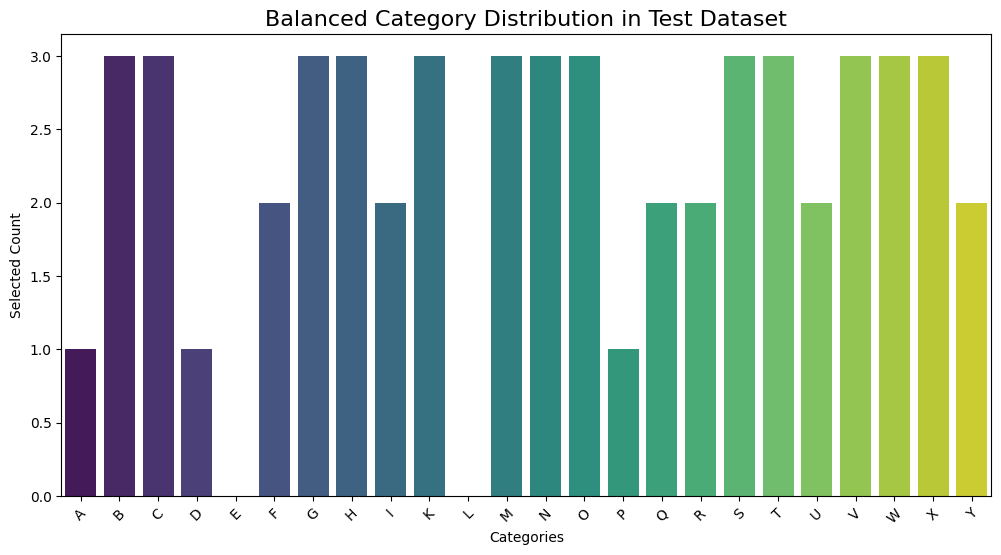

In [16]:
select_and_visualize_images(
    df=test_csv,
    source_folder="dataset/ASL-Dataset/test",
    destination_folder="dataset/ASL-Dataset/selected_test",
    num_samples=3,
    title="Balanced Category Distribution in Test Dataset"
)

Category  Count
       A      5
       B      6
       C      3
       D      6
       E      4
       F      6
       G      5
       H      6
       I      2
       K      6
       L      4
       M      6
       N      4
       O      6
       P      6
       Q      4
       R      6
       S      4
       T      6
       U      6
       V      5
       W      3
       X      1
       Y      6


<ipython-input-12-5d1048d67be4>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(selected_counts.keys()), y=list(selected_counts.values()), palette="viridis")


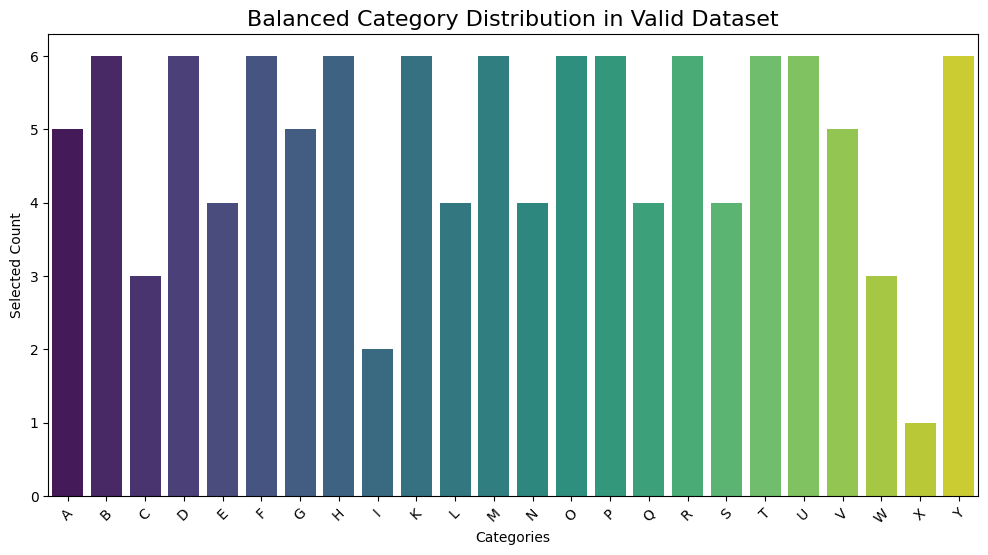

In [17]:
select_and_visualize_images(
    df=valid_csv,
    source_folder="dataset/ASL-Dataset/valid",
    destination_folder="dataset/ASL-Dataset/selected_valid",
    num_samples=6,
    title="Balanced Category Distribution in Valid Dataset"
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Parameters
IMAGE_SIZE = (128, 128)  # Resize images to 128x128
BATCH_SIZE = 32         # Batch size for training
SEED = 42               # Random seed for reproducibility

# Function to prepare data generators
def prepare_image_generators(train_csv, test_csv, valid_csv, base_path):
    # Add the file path to the CSV data
    def add_file_path(df, folder):
        df['file_path'] = df['filename'].apply(lambda x: os.path.join(base_path, folder, x))
        return df

    train_csv = add_file_path(train_csv, "train")
    test_csv = add_file_path(test_csv, "test")
    valid_csv = add_file_path(valid_csv, "valid")

    # Convert DataFrame to numpy arrays for generators
    def get_image_and_labels(df):
        images = []
        labels = []
        for _, row in df.iterrows():
            # Load and resize image
            img = tf.keras.utils.load_img(row['file_path'], target_size=IMAGE_SIZE)
            img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            labels.append(row[1:].values)  # One-hot encoded labels (excluding filename)
        return np.array(images), np.array(labels)

    train_images, train_labels = get_image_and_labels(train_csv)
    test_images, test_labels = get_image_and_labels(test_csv)
    valid_images, valid_labels = get_image_and_labels(valid_csv)

    return train_images, train_labels, test_images, test_labels, valid_images, valid_labels

# Prepare image arrays and labels
train_images, train_labels, test_images, test_labels, valid_images, valid_labels = prepare_image_generators(
    train_csv, test_csv, valid_csv, "dataset/ASL-Dataset"
)

# Print dataset shapes for verification
print(f"Train Images Shape: {train_images.shape}, Train Labels Shape: {train_labels.shape}")
print(f"Test Images Shape: {test_images.shape}, Test Labels Shape: {test_labels.shape}")
print(f"Valid Images Shape: {valid_images.shape}, Valid Labels Shape: {valid_labels.shape}")


Train Images Shape: (1512, 128, 128, 3), Train Labels Shape: (1512, 27)
Test Images Shape: (72, 128, 128, 3), Test Labels Shape: (72, 27)
Valid Images Shape: (144, 128, 128, 3), Valid Labels Shape: (144, 27)


In [18]:
import shutil

# Zip the folder
shutil.make_archive('/content/selected_train', 'zip', '/content/dataset/ASL-Dataset/selected_train')

# Download the zip file
from google.colab import files
files.download('/content/selected_train.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import shutil

# Zip the folder
shutil.make_archive('/content/selected_test', 'zip', '/content/dataset/ASL-Dataset/selected_test')

# Download the zip file
from google.colab import files
files.download('/content/selected_test.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import shutil

# Zip the folder
shutil.make_archive('/content/selected_valid', 'zip', '/content/dataset/ASL-Dataset/selected_valid')

# Download the zip file
from google.colab import files
files.download('/content/selected_valid.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:

#Training Dataset
import pandas as pd

# Load the dataset"
df_train2 = pd.read_csv("/content/dataset/sign_mnist_train.csv")

# Display basic info and first few rows
df_train2.info(), df_train2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


(None,
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  
 0      

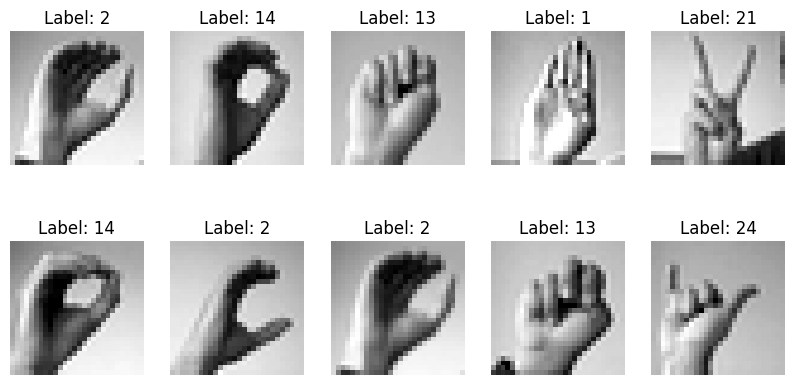

In [27]:

import matplotlib.pyplot as plt
import numpy as np

# Extract labels and pixel values
labels = df_train2["label"].values
images = df_train2.iloc[:, 1:].values.reshape(-1, 28, 28)  # Reshape to 28x28 images

# Display some random images with their labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, len(images))  # Random index
    axes[i].imshow(images[idx], cmap="gray")
    axes[i].set_title(f"Label: {labels[idx]}")
    axes[i].axis("off")

plt.show()

label
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: count, dtype: int64


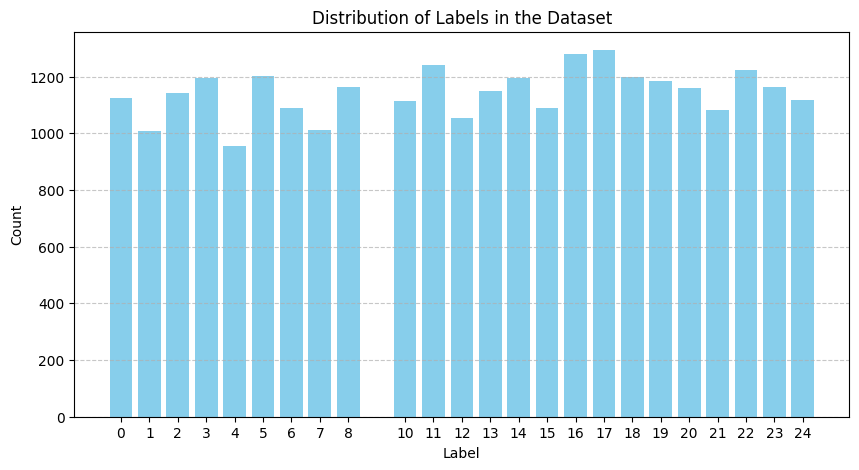

In [28]:
class_distribution = df_train2["label"].value_counts().sort_index()

# Display distribution
print(class_distribution)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(class_distribution.index, class_distribution.values, color="skyblue")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in the Dataset")
plt.xticks(class_distribution.index)  # Ensure all labels are shown
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()